In [211]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [212]:
#carregando o DataSet
dataBreastCancer = pd.read_csv("data.csv")

In [213]:
# a features target é representada pela coluna diagnosis
dataBreastCancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [214]:
# as colunas id e Unnamed: 32 não serão utilizadas no modelo e a coluna diagnosis é a target
#y= dataBreastCancer.iloc[:,1]

lista = ['id','Unnamed: 32','diagnosis']
dataBreastCancer = dataBreastCancer = dataBreastCancer.drop(labels= lista, axis=1)
dataBreastCancer.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [215]:
#verificando o numero de linhas e colunas
dataBreastCancer.shape

(569, 30)

In [216]:
#verificando se o dataset possui valores faltantes (se sim, devem ser tratados)
dataBreastCancer.isnull().any()

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
dtype: boo

In [217]:
#com o describe verificamos que há uma discrepância muito grande entre os valores max de cada feature, o que poderá dificultar a visualização dos plots
#sendo então necessários fazermos uma normalização dos dados
dataBreastCancer.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

In [218]:
dataBreastCancerNormalize = (dataBreastCancer - dataBreastCancer.mean()) / (dataBreastCancer.std()) #normalização
dataBreastCancerNormalize.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   fractal_dimension_mean           ...             radius_worst  \
0                2.253764           ...                 1.885031   
1               -0.867889           ...                 1.804340   
2               -0.397658           ...                 1.510541   
3                4.906602           ...                -0.281217   
4               -0.561956           ...                 1.297434   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0      -1.358098         2.301575    1.999478          1.306537   
1      -0.368879         1.533776    1.888827         -0.375282   
2      -0.023953         1.346291    1.455004          0.526944   
3       0.133866        -0.249720   -0.549538          3.391291   
4      -1.465481         1.337363    1.219651          0.220362   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           2.614365         2.107672              2.294058        2.748204   
1          -0.430066        -0.146620              1.086129       -0.243675   
2           1.081980         0.854222              1.953282        1.151242   
3           3.889975         1.987839              2.173873        6.040726   
4          -0.313119         0.612640              0.728618       -0.867590   

   fractal_dimension_worst  
0                 1.935312  
1                 0.280943  
2                 0.201214  
3                 4.930672  
4                -0.396751  

[5 rows x 30 columns]

In [219]:
#agora podemos perceber que as features estão normalizadas
dataBreastCancerNormalize.describe()

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -3.136331e-15 -6.558316e-15   -7.012551e-16 -8.339355e-16   
std    1.000000e+00  1.000000e+00    1.000000e+00  1.000000e+00   
min   -2.027864e+00 -2.227289e+00   -1.982759e+00 -1.453164e+00   
25%   -6.887793e-01 -7.253249e-01   -6.913472e-01 -6.666089e-01   
50%   -2.148925e-01 -1.045442e-01   -2.357726e-01 -2.949274e-01   
75%    4.689800e-01  5.836621e-01    4.992377e-01  3.631877e-01   
max    3.967796e+00  4.647799e+00    3.972634e+00  5.245913e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      6.120470e-15     -1.074321e-15   -4.031144e-16         1.006030e-15   
std       1.000000e+00      1.000000e+00    1.000000e+00         1.000000e+00   
min      -3.109349e+00     -1.608721e+00   -1.113893e+00        -1.260710e+00   
25%      -7.103378e-01     -7.464292e-01   -7.430941e-01        -7.372951e-01   
50%      -3.486040e-02     -2.217454e-01   -3.419391e-01        -3.973715e-01   
75%       6.356397e-01      4.934227e-01    5.255994e-01         6.463664e-01   
max       4.766717e+00      4.564409e+00    4.239858e+00         3.924477e+00   

       symmetry_mean  fractal_dimension_mean           ...             \
count   5.690000e+02            5.690000e+02           ...              
mean   -1.888550e-15            4.860396e-16           ...              
std     1.000000e+00            1.000000e+00           ...              
min    -2.741705e+00           -1.818265e+00           ...              
25%    -7.026215e-01           -7.220040e-01           ...              
50%    -7.156354e-02           -1.781226e-01           ...              
75%     5.303125e-01            4.705693e-01           ...              
max     4.480808e+00            4.906602e+00           ...              

       radius_worst  texture_worst  perimeter_worst    area_worst  \
count  5.690000e+02   5.690000e+02     5.690000e+02  5.690000e+02   
mean  -2.346102e-15   1.761138e-15    -1.214416e-15  5.919889e-16   
std    1.000000e+00   1.000000e+00     1.000000e+00  1.000000e+00   
min   -1.725382e+00  -2.222039e+00    -1.691872e+00 -1.221348e+00   
25%   -6.743279e-01  -7.479711e-01    -6.889721e-01 -6.415713e-01   
50%   -2.688030e-01  -4.347738e-02    -2.857288e-01 -3.408813e-01   
75%    5.215568e-01   6.577623e-01     5.398040e-01  3.572747e-01   
max    4.090590e+00   3.882489e+00     4.283568e+00  5.924959e+00   

       smoothness_worst  compactness_worst  concavity_worst  \
count      5.690000e+02       5.690000e+02     5.690000e+02   
mean      -5.033661e-15      -2.118204e-15     6.649631e-16   
std        1.000000e+00       1.000000e+00     1.000000e+00   
min       -2.680337e+00      -1.442609e+00    -1.304683e+00   
25%       -6.906227e-01      -6.804845e-01    -7.558491e-01   
50%       -4.680159e-02      -2.692639e-01    -2.180402e-01   
75%        5.970195e-01       5.391944e-01     5.306742e-01   
max        3.951897e+00       5.108382e+00     4.696536e+00   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count          5.690000e+02    5.690000e+02             5.690000e+02  
mean          -1.795088e-16   -2.481734e-15             2.424930e-15  
std            1.000000e+00    1.000000e+00             1.000000e+00  
min           -1.743529e+00   -2.159060e+00            -1.600431e+00  
25%           -7.557349e-01   -6.412994e-01            -6.913035e-01  
50%           -2.232725e-01   -1.272975e-01            -2.162538e-01  
75%            7.118836e-01    4.497425e-01             4.503661e-01  
max            2.683516e+00    6.040726e+00             6.840837e+00  

[8 rows x 30 columns]

dataBreastCancer.isnull().any

### <p style="color:blue"> Agora vamos plotar graficos para entender melhor como as features se relacionam e quais são mais relevantes para o modelo</p>

In [220]:
#para facilitar a visualização os dataset será divido em três grupos:
# 1 grupo: 1 coluna até a 11
# 2 grupo: 11 coluna até a 20
# 1 grupo: 20 coluna até a 31

grupoMean = dataBreastCancerNormalize.iloc[:,0:10]
grupoSe = dataBreastCancerNormalize.iloc[:,10:20]
grupoWorst = dataBreastCancerNormalize.iloc[:,20:30]

dataGrupoMean= pd.concat([y,grupoMean], axis=1)
dataGrupoSe = pd.concat([y,grupoSe], axis=1)
dataGrupoworst = pd.concat([y,grupoWorst],axis=1)

#### <p style="color:green"> Verificando como se relacionam as features do grupoMean </p>

/home/lets/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

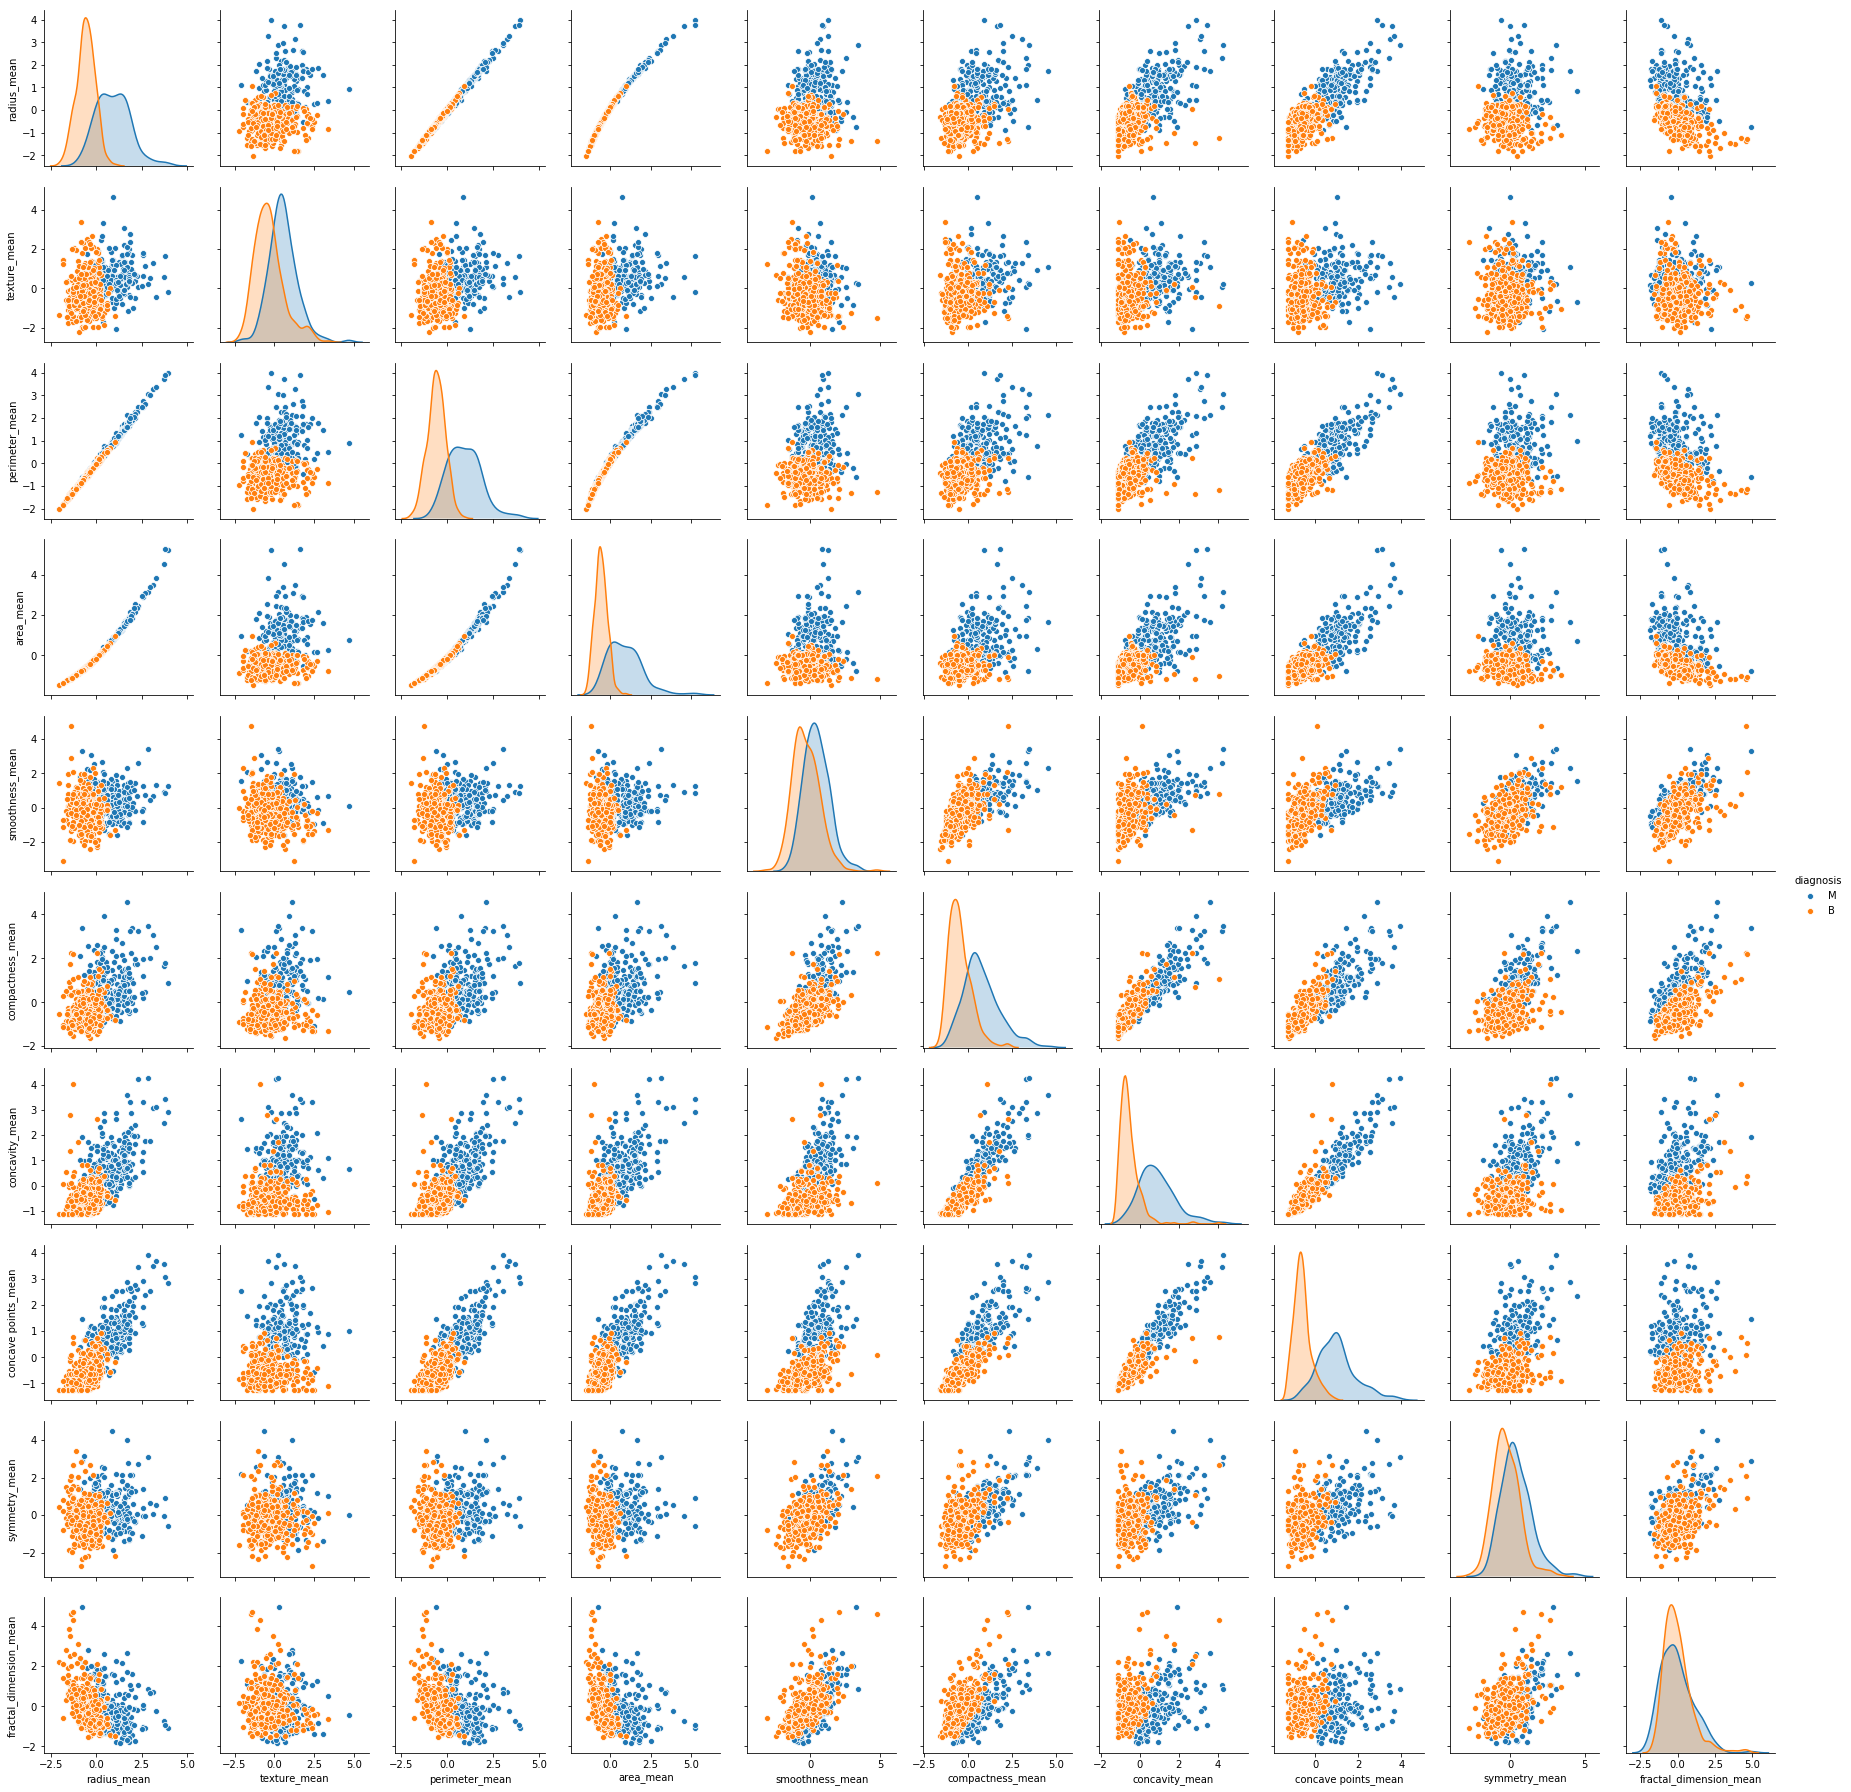

In [221]:
#verificando como os pares de features se comportam com relacao a target

plt.figure(figsize=(10,10))
sns.pairplot(dataGrupoMean, hue= 'diagnosis')

##### <p style="color:red"> Pelo paiplot podemos verificar que algumas features possuem relação de correlação, em destaque:'radius_mean', 'perimeter_mean' e 'area_mean' 

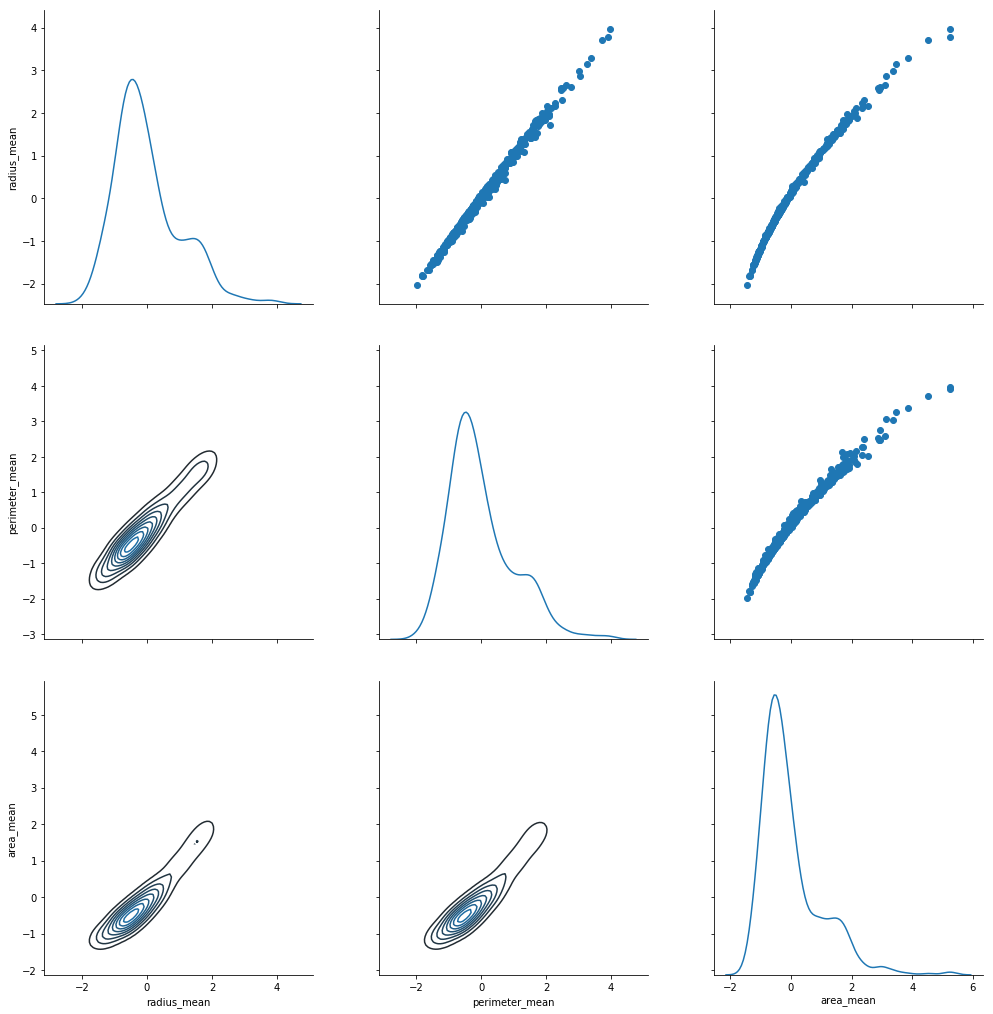

In [222]:
#vamos ver a correlação destas tres features mais de perto
g= sns.PairGrid(data= dataGrupoMean.loc[:,['radius_mean','perimeter_mean','area_mean']])

g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

g.fig.set_size_inches(15,15)

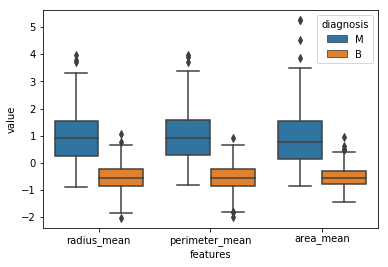

In [223]:
#vamos ver como os dados estão separados pela target em cada uma dessas features
df= dataGrupoMean.loc[:,['diagnosis','radius_mean','perimeter_mean','area_mean']] 
df = pd.melt(df, id_vars='diagnosis', var_name= 'features', value_name= 'value') #transforma o dataset 

sns.boxplot(x='features',y='value',data= df, hue='diagnosis')

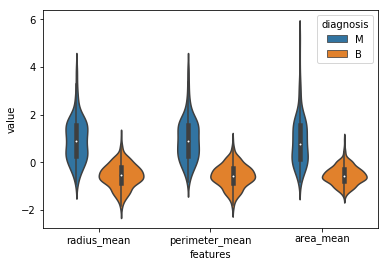

In [224]:
sns.violinplot(x='features',y='value',data= df, hue='diagnosis')

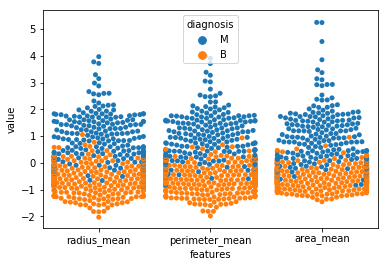

In [225]:
# os graficos anteriores nao ajudaram muito na escolha da variavel, plotando o swarmplot a variavel 
#'area_mean' aparentemente possui os dados mais bem classificados entre 'M' e 'B'
sns.swarmplot(x='features',y='value',data= df, hue='diagnosis')

In [226]:
#pelos graficos plotados vamos escolher apriore a feature "area_mean" para ser usado no modelo
lista= ['radius_mean','perimeter_mean']
dataBreastCancer=dataBreastCancer.drop(lista, axis=1)
dataBreastCancer.head()

texture_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0         10.38     1001.0          0.11840           0.27760          0.3001   
1         17.77     1326.0          0.08474           0.07864          0.0869   
2         21.25     1203.0          0.10960           0.15990          0.1974   
3         20.38      386.1          0.14250           0.28390          0.2414   
4         14.34     1297.0          0.10030           0.13280          0.1980   

   concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0              0.14710         0.2419                 0.07871     1.0950   
1              0.07017         0.1812                 0.05667     0.5435   
2              0.12790         0.2069                 0.05999     0.7456   
3              0.10520         0.2597                 0.09744     0.4956   
4              0.10430         0.1809                 0.05883     0.7572   

   texture_se           ...             radius_worst  texture_worst  \
0      0.9053           ...                    25.38          17.33   
1      0.7339           ...                    24.99          23.41   
2      0.7869           ...                    23.57          25.53   
3      1.1560           ...                    14.91          26.50   
4      0.7813           ...                    22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 28 columns]

#### <p style="color:green"> Verificando como se relacionam as features do grupoSe </p>

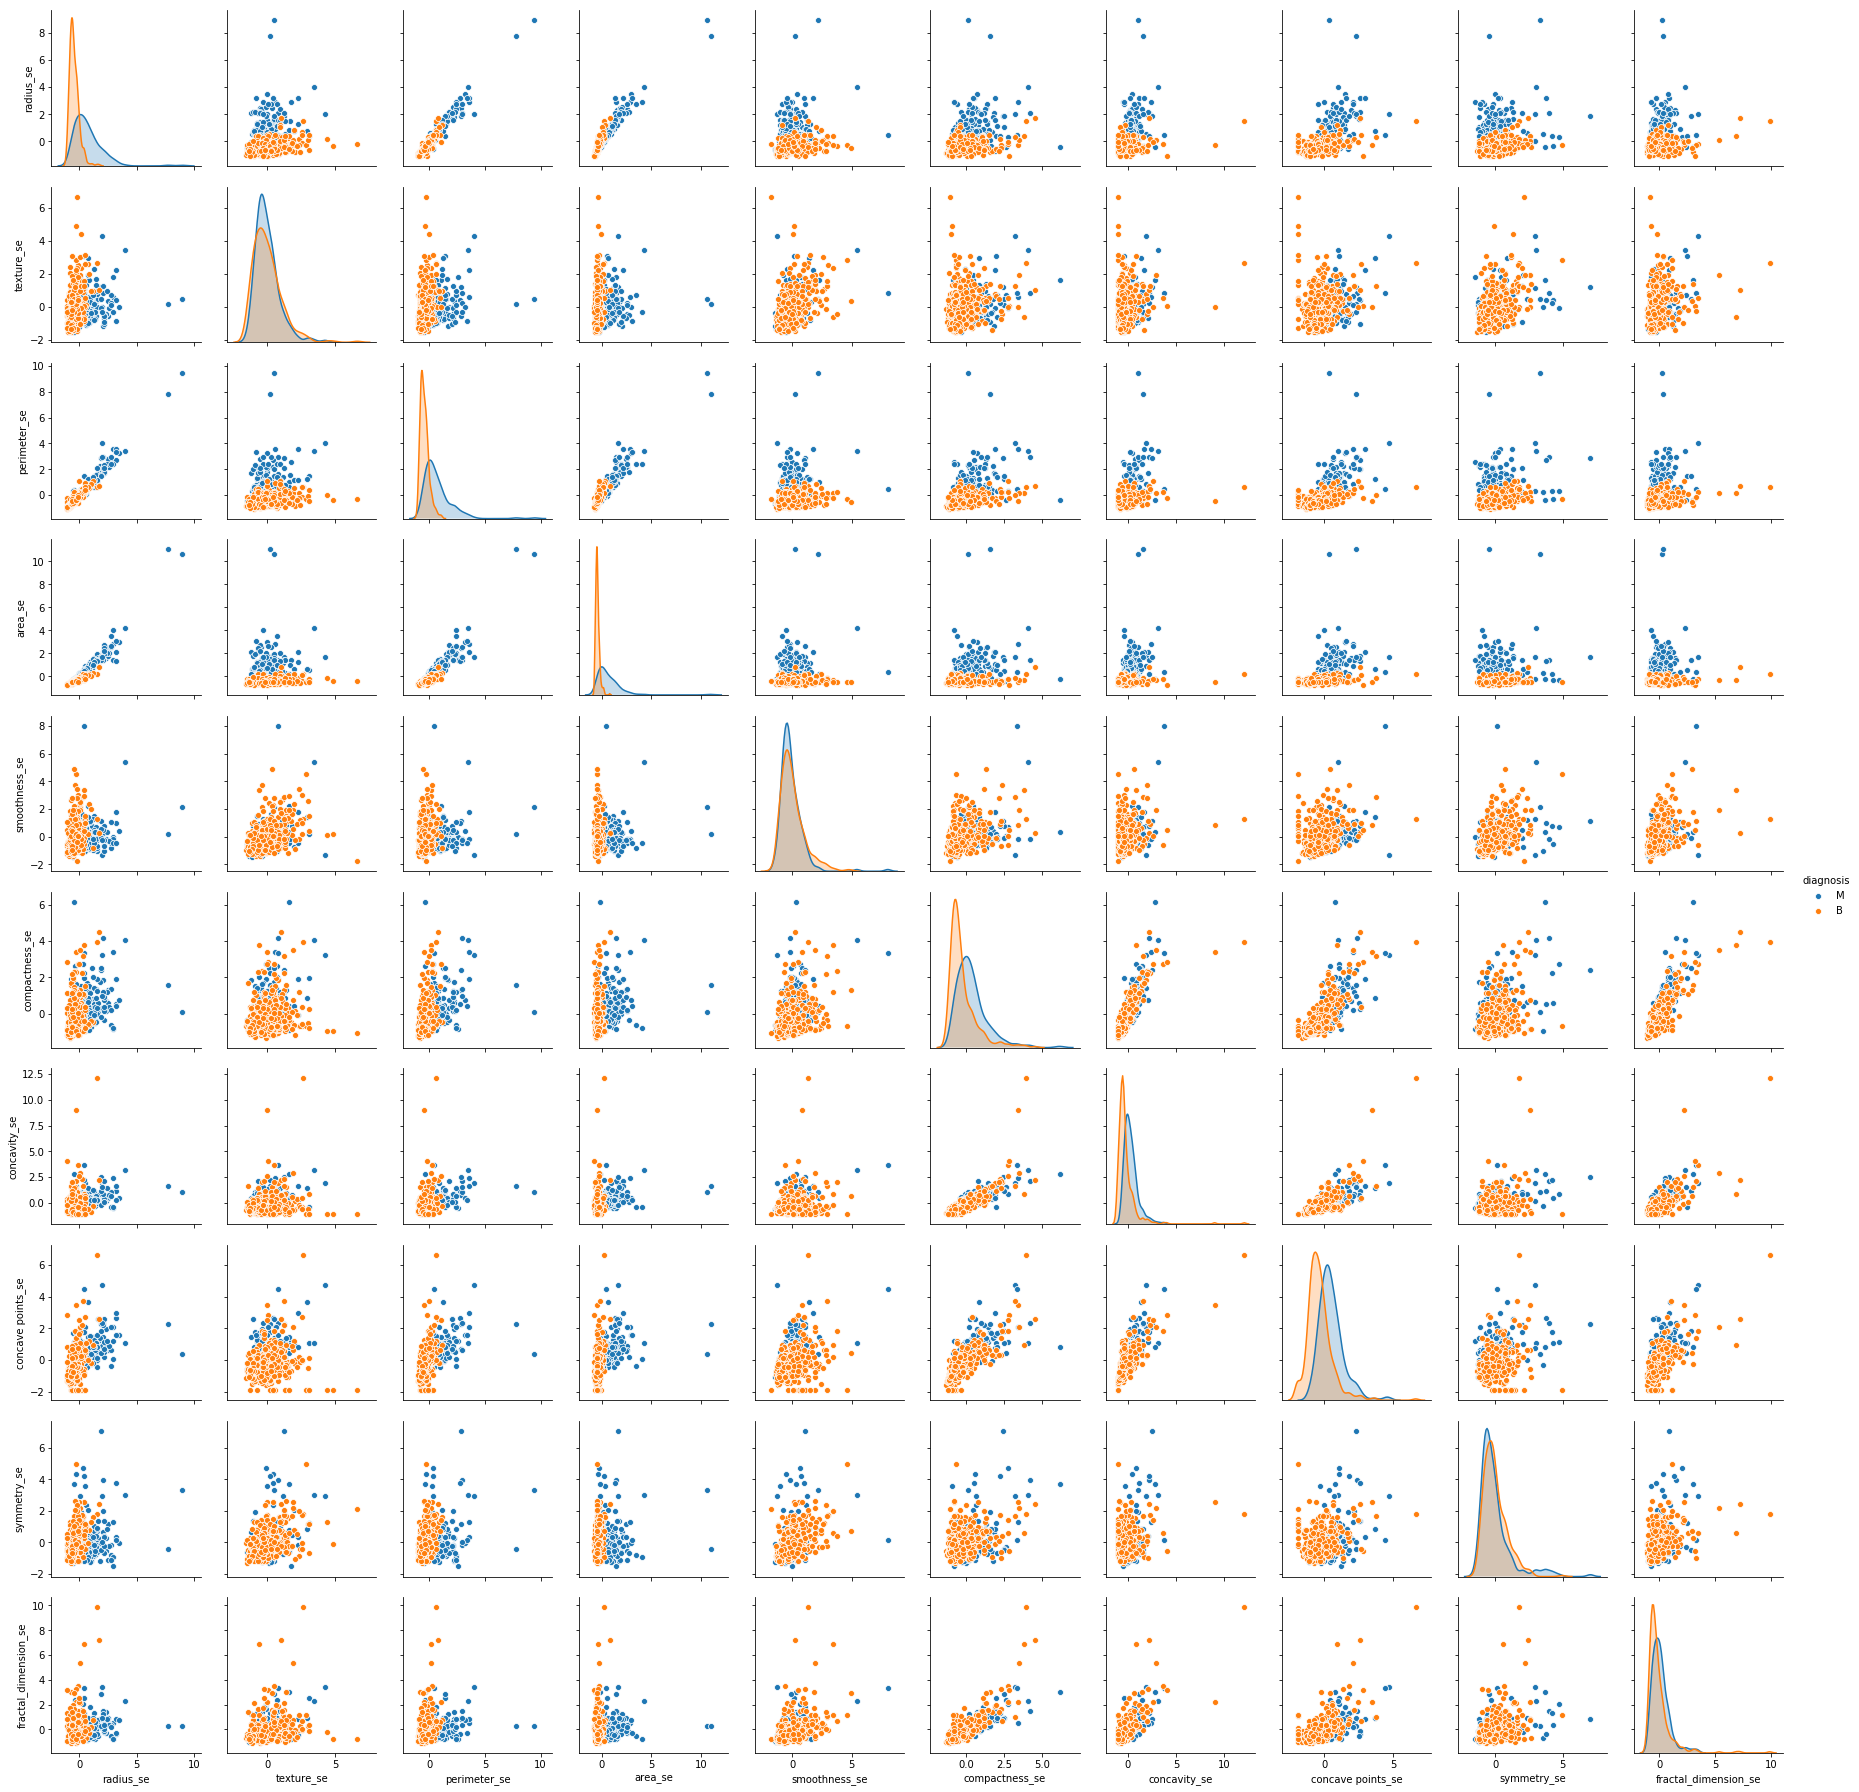

In [227]:
sns.pairplot(dataGrupoSe, hue='diagnosis')


#### <p style="color:red"> As features 'radius_se', 'perimeter_se' e 'area_se' parece possuirem correlação. Vamos estudar essas features mais de perto</p>

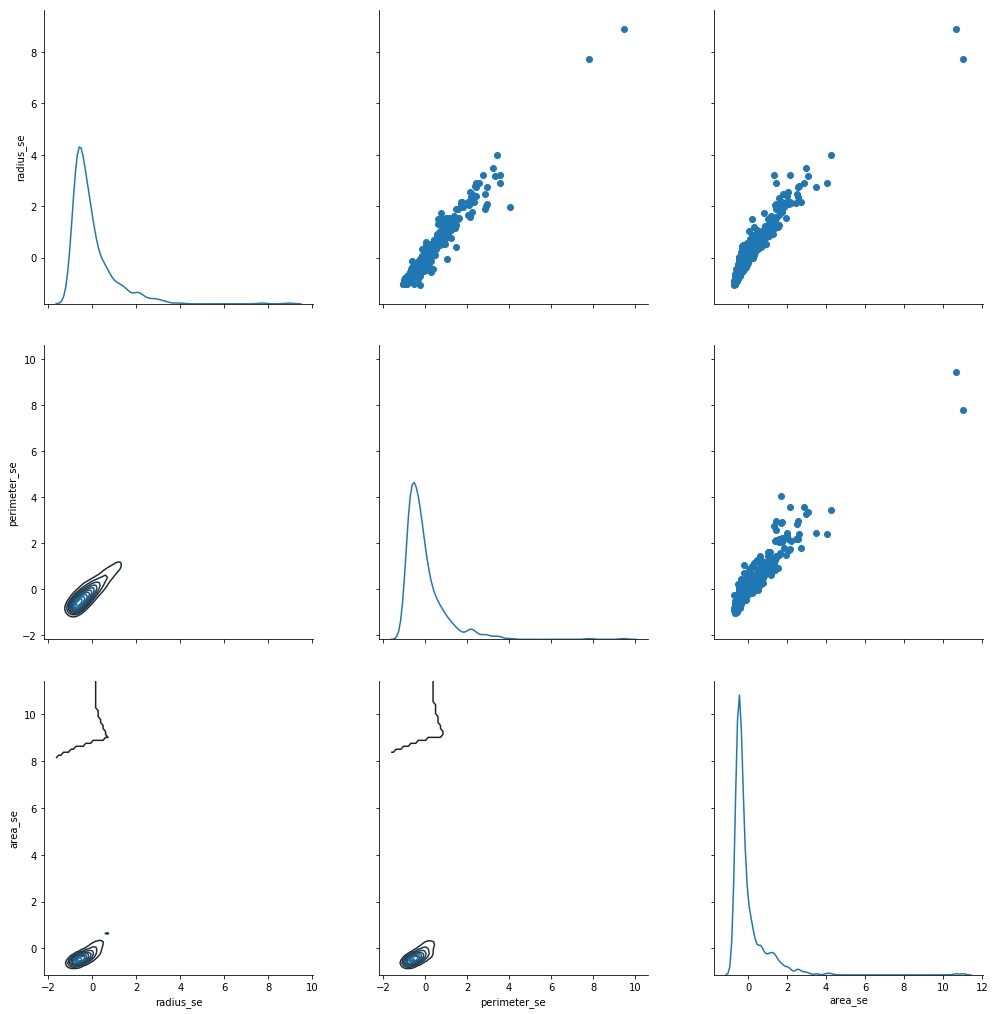

In [228]:
g = sns.PairGrid(data = grupoSe.loc[:,['radius_se','perimeter_se','area_se']])

g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter)

g.fig.set_size_inches(15,15)

In [229]:
#ajustando os dados para o plot
df= dataGrupoSe.loc[:,['diagnosis','radius_se','perimeter_se','area_se']]
df= pd.melt(df,id_vars='diagnosis',var_name='features',value_name='value')


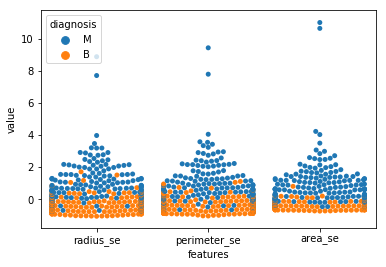

In [230]:
sns.swarmplot(x='features', y ='value', data=df, hue='diagnosis')

<p style="color:red"> A feature 'area_se' aparenta possuir os dados melhor separados de acordo com a target</p>

In [231]:
lista = ['perimeter_se','radius_se']
dataBreastCancer = dataBreastCancer.drop(lista, axis=1)

#### <p style = "color:green"> Vamos analizar o ultimo grupo de variáveis grupoWorst </p>

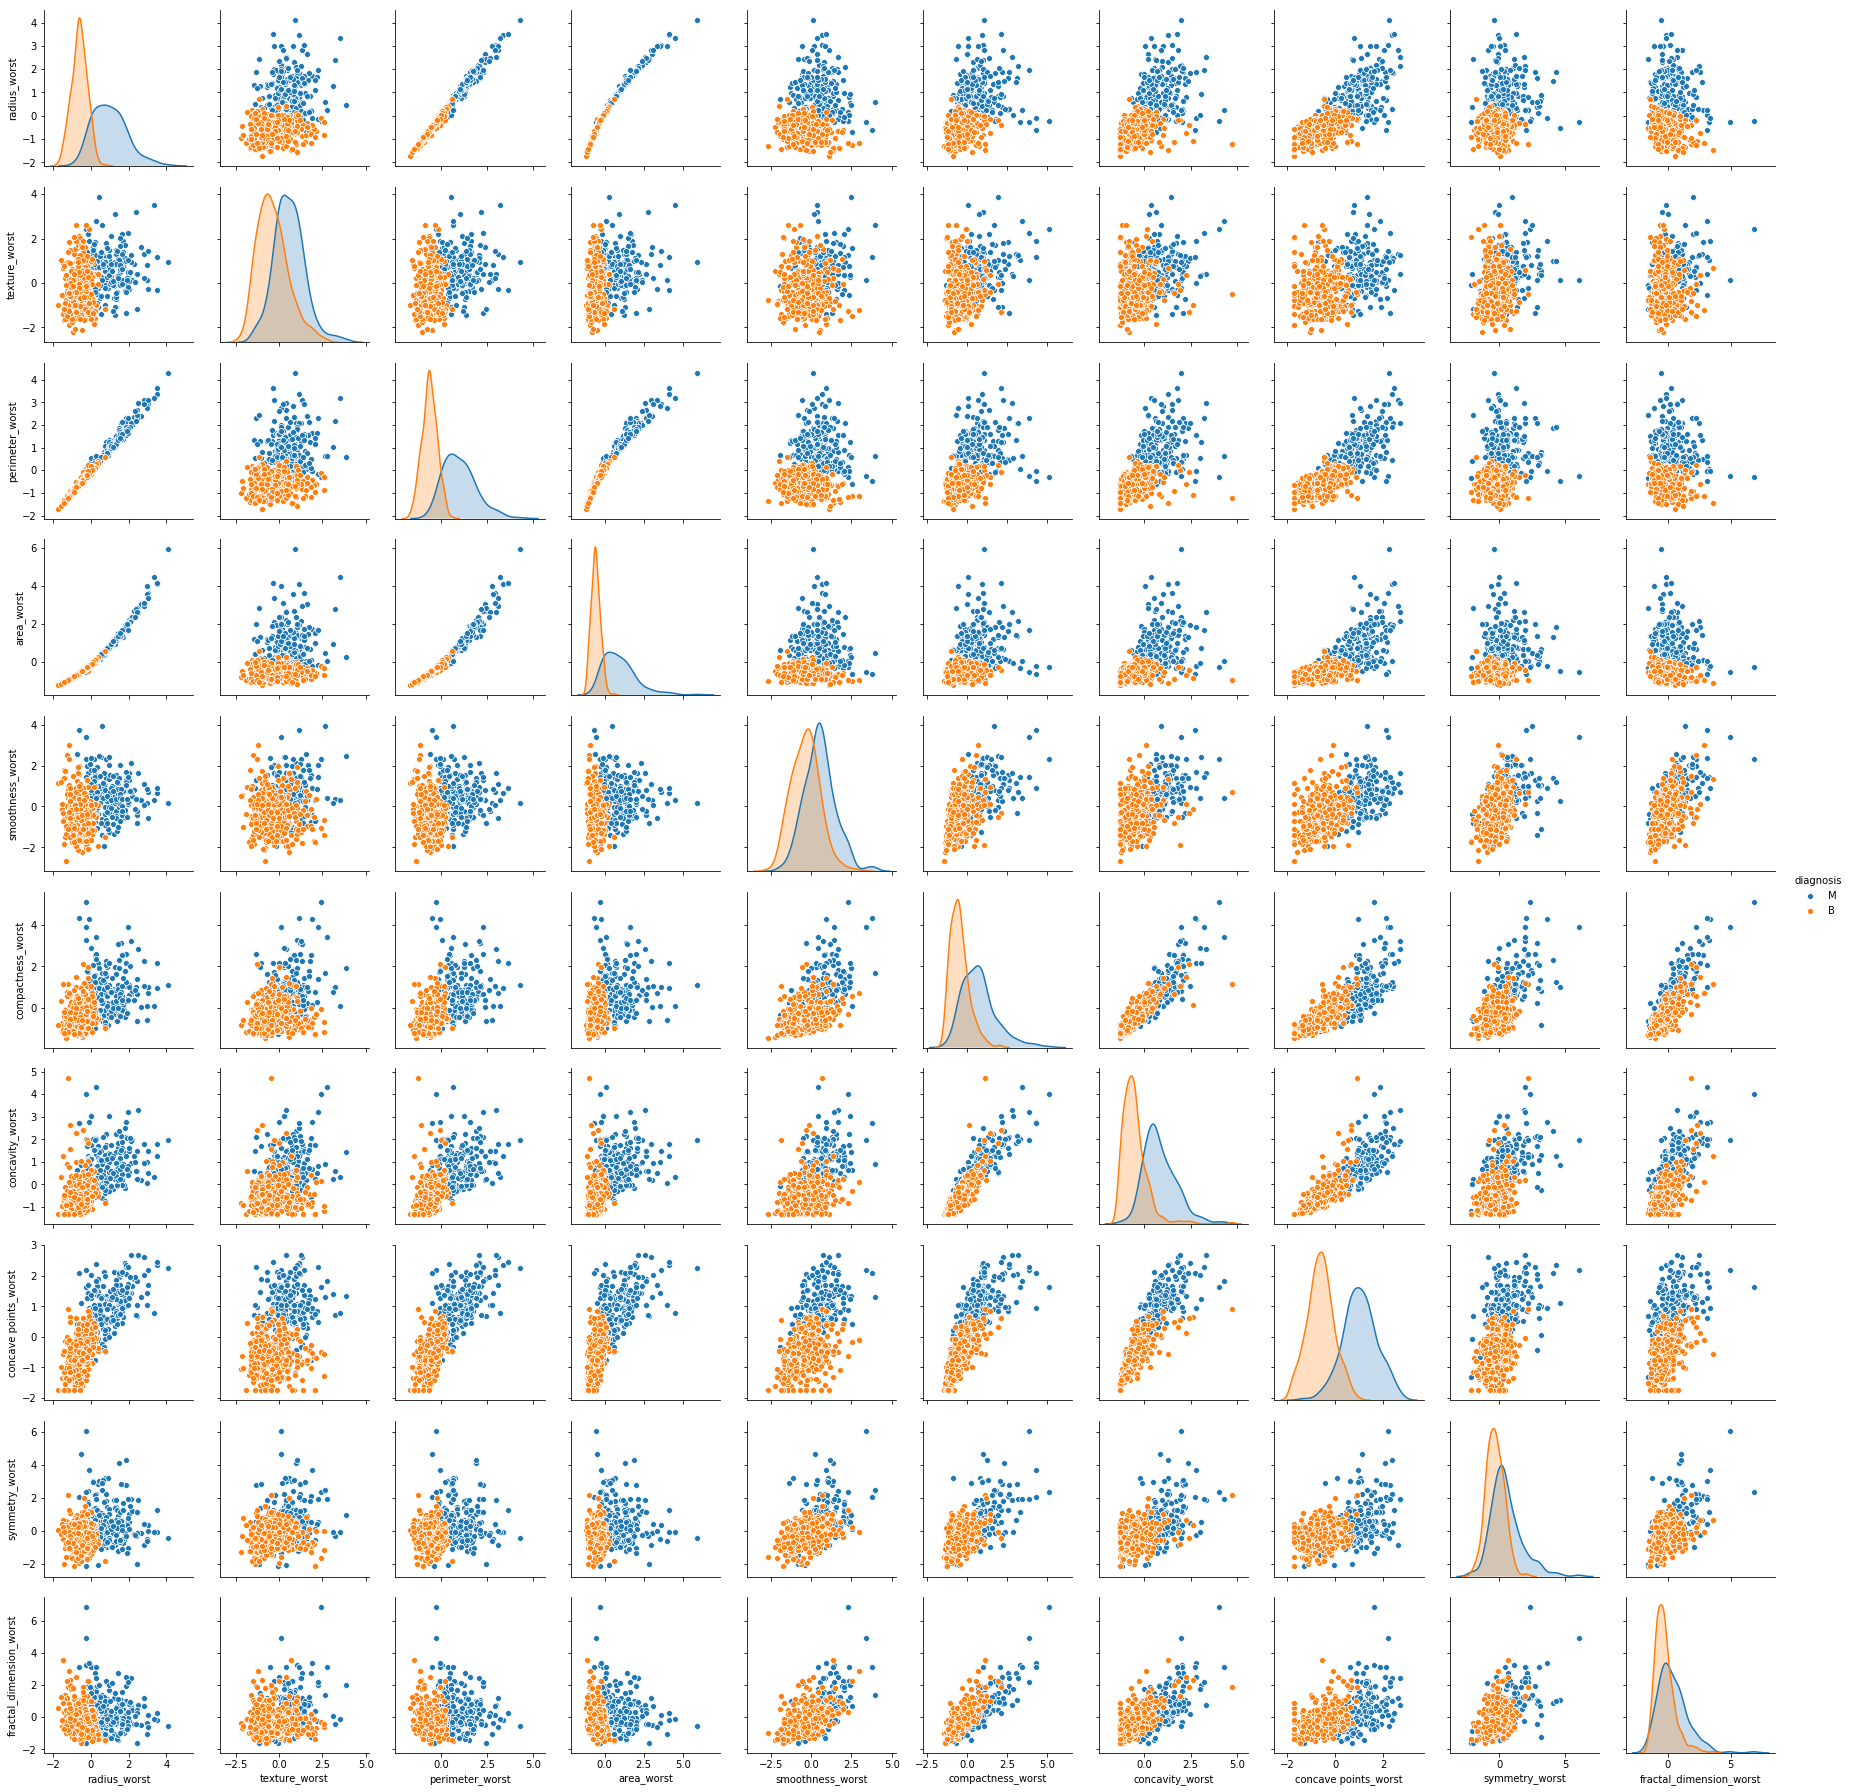

In [232]:
sns.pairplot(data= dataGrupoworst, hue= 'diagnosis')

In [233]:
df = dataGrupoworst.loc[:, ['diagnosis','radius_worst','perimeter_worst','area_worst']]
df

diagnosis  radius_worst  perimeter_worst  area_worst
0           M      1.885031         2.301575    1.999478
1           M      1.804340         1.533776    1.888827
2           M      1.510541         1.346291    1.455004
3           M     -0.281217        -0.249720   -0.549538
4           M      1.297434         1.337363    1.219651
5           M     -0.165353        -0.114908   -0.244105
6           M      1.367780         1.367122    1.274098
7           M      0.163619         0.099361    0.028834
8           M     -0.161215        -0.031581   -0.248145
9           M     -0.243975        -0.286026   -0.297148
10          M      0.604317         0.492189    0.473195
11          M      0.858805         0.870136    0.734894
12          M      0.970531         1.322483    0.792854
13          M      0.118101         0.141025   -0.007171
14          M     -0.256389         0.045794   -0.321210
15          M      0.246379         0.501116    0.109978
16          M      0.579489         0.480285    0.452119
17          M      0.970531         0.879064    0.762996
18          M      2.286418         2.367047    2.665141
19          B     -0.239837        -0.225019   -0.297499
20          B     -0.366046        -0.332451   -0.439238
21          B     -1.249511        -1.253810   -0.993547
22          M      0.372588         0.530876    0.176193
23          M      2.669184         2.402758    3.046273
24          M      2.108484         2.075402    2.343726
25          M      1.237432         1.343315    1.019425
26          M      0.279483         0.450525    0.028658
27          M      1.042946         0.971319    0.917556
28          M      0.827770         1.251060    0.682203
29          M      0.773975         0.822521    0.608435
..        ...           ...              ...         ...
539         B     -1.570621        -1.570453   -1.153904
540         B     -0.829503        -0.847591   -0.742562
541         B     -0.010177         0.185664   -0.125902
542         B      0.049824         0.004130   -0.095165
543         B     -0.392943        -0.439884   -0.440819
544         B     -0.252251        -0.240792   -0.337193
545         B     -0.190181        -0.288110   -0.264831
546         B     -1.038473        -1.075550   -0.870602
547         B     -1.125371        -1.076740   -0.918902
548         B     -1.104681        -1.135664   -0.906958
549         B     -0.670190        -0.695222   -0.658608
550         B     -0.953644        -0.987461   -0.822477
551         B     -0.879159        -0.876755   -0.779797
552         B     -0.496394        -0.570231   -0.502116
553         B     -1.329168        -1.321365   -1.027094
554         B     -0.492256        -0.548209   -0.500359
555         B     -1.123302        -1.121677   -0.918550
556         B     -1.162613        -1.171971   -0.936641
557         B     -1.195717        -1.213040   -0.965972
558         B     -0.163284        -0.040509   -0.258332
559         B     -0.783985        -0.743432   -0.713758
560         B     -0.200526        -0.210139   -0.305403
561         B     -0.899849        -0.954428   -0.774528
562         M      0.258793         0.638011    0.060449
563         M      1.659509         2.137897    1.648205
564         M      1.899514         1.751022    2.013529
565         M      1.535369         1.420690    1.493644
566         M      0.560868         0.578492    0.427529
567         M      1.959515         2.301575    1.651717
568         B     -1.409652        -1.431475   -1.074867

[569 rows x 4 columns]

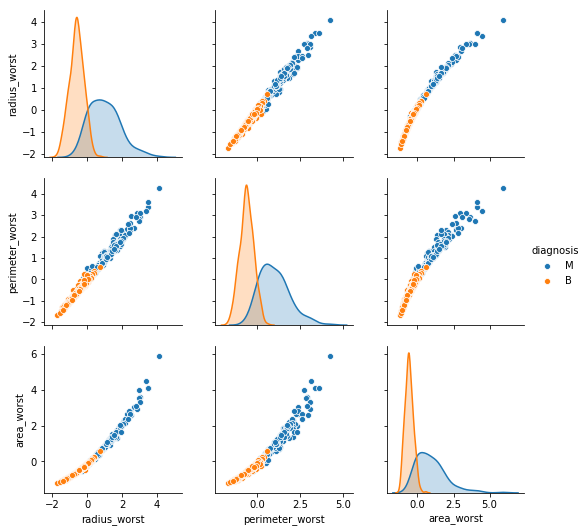

In [234]:
sns.pairplot(data=df,hue='diagnosis')

In [235]:
df=pd.melt(df, id_vars='diagnosis',var_name='features',value_name='value')


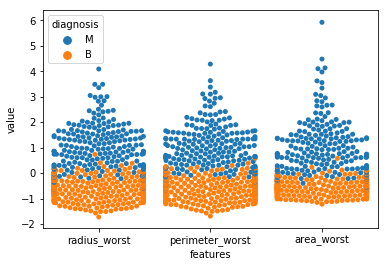

In [236]:
sns.swarmplot(x='features', y='value', data=df,hue='diagnosis')

In [237]:
lista= ['radius_worst','perimeter_worst']
dataBreastCancer = dataBreastCancer.drop(lista, axis=1)

In [238]:
dataBreastCancer.head()

texture_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0         10.38     1001.0          0.11840           0.27760          0.3001   
1         17.77     1326.0          0.08474           0.07864          0.0869   
2         21.25     1203.0          0.10960           0.15990          0.1974   
3         20.38      386.1          0.14250           0.28390          0.2414   
4         14.34     1297.0          0.10030           0.13280          0.1980   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se           ...             symmetry_se  fractal_dimension_se  \
0   153.40           ...                 0.03003              0.006193   
1    74.08           ...                 0.01389              0.003532   
2    94.03           ...                 0.02250              0.004571   
3    27.23           ...                 0.05963              0.009208   
4    94.44           ...                 0.01756              0.005115   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0          17.33      2019.0            0.1622             0.6656   
1          23.41      1956.0            0.1238             0.1866   
2          25.53      1709.0            0.1444             0.4245   
3          26.50       567.7            0.2098             0.8663   
4          16.67      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 24 columns]

### <p style="color:blue"> Agora que já analisamos as correlações mais aparentes, vamos olhar para as outras features e a relação entre elas</p>

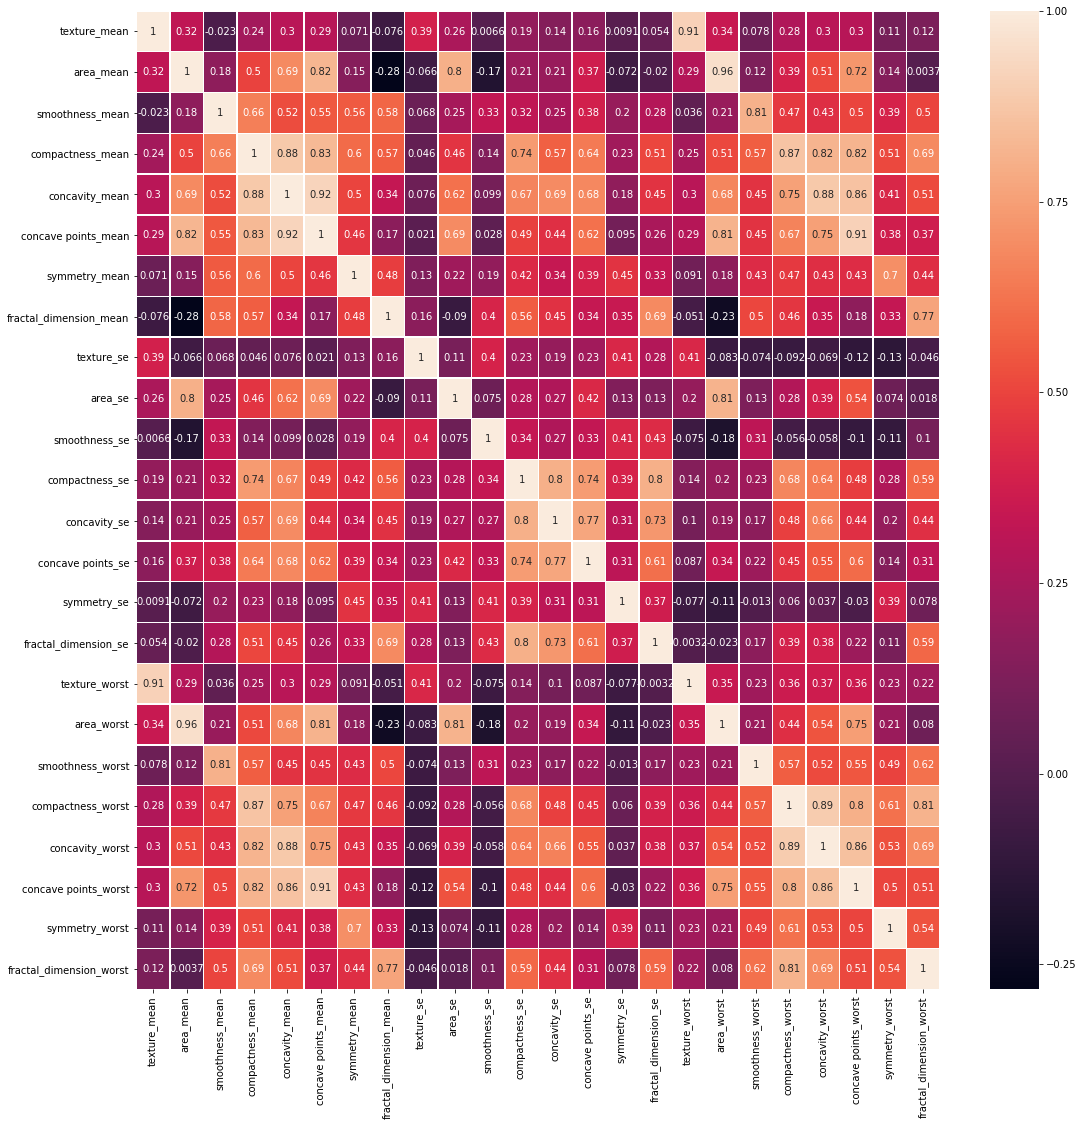

In [239]:
# +1 = forte correcaoção positiva (se o valor de uma variavel aumenta a da outra tambem aumenta)
# 0 = não há correlação
# -1 = forte correlação negativa (se o valor de uma variável aumenta o da outra diminui)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataBreastCancer.corr(),annot=True,linewidths=.5,ax=ax)

### <p style="color:red"> Pelo gráfico podemos perceber que as seguinte variáveis sao correlacionadas</p>

   <ul style="color:red">
        <li> 'concavity_mean' , 'compactness_mean' e 'concave points_mean'
        <li> 'area_worst', 'area_se' e 'concave points_mean' são correlaciodas com 'area_mean' 
        <li> 'compactness_mean', 'concavity_mean', 'concave points_mean' relacionadas com 'concave points_worst'
        <li> 'compactness_worst', 'concavity_worst' e 'concavity_mean'
        <li> 'texture_worst' e 'texture_mean'
   </ul>



In [240]:
#Agora vamos analisar as variaveis correlacionadas separadamente de acordo com a target

In [241]:
df = dataBreastCancerNormalize.loc[:,['concavity_mean','compactness_mean','concave points_mean']]
df = pd.concat([y,df],axis=1)

In [242]:
df = pd.melt(df,id_vars='diagnosis',var_name='features',value_name='value')

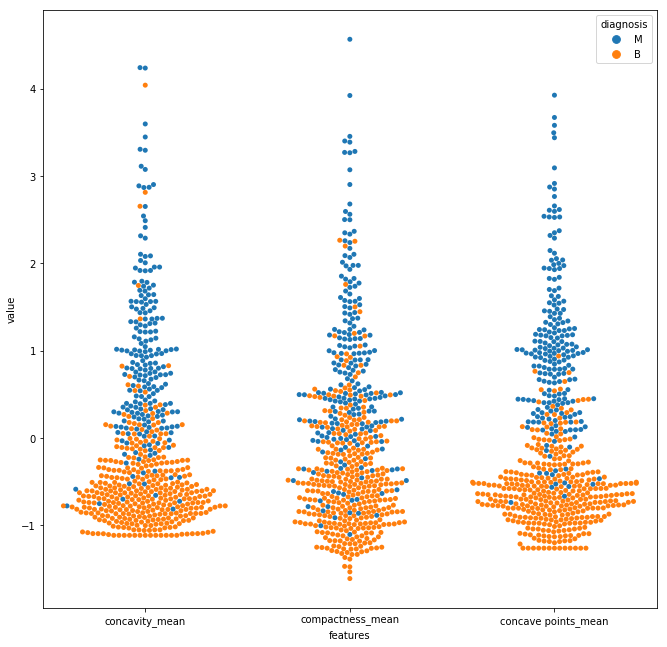

In [243]:
f,ax = plt.subplots(figsize=(11, 11))
sns.swarmplot(x='features',y='value',hue='diagnosis', data=df)

In [244]:
#aparentemente concave points_mean mostra o dados melhores classificados

In [245]:
df = dataBreastCancerNormalize.loc[:,['area_worst', 'area_se','concave points_mean','area_mean']]
df= pd.concat([y,df], axis=1)

In [246]:
df = pd.melt(df,id_vars='diagnosis',var_name='features',value_name='value')

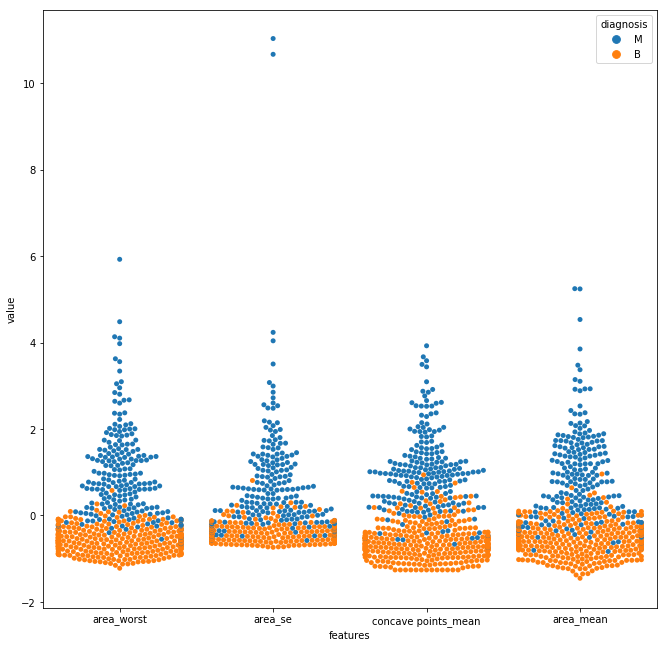

In [247]:
f,ax = plt.subplots(figsize=(11, 11))
sns.swarmplot(x='features',y='value',hue='diagnosis', data=df)

In [248]:
# concave points_mean aparenta representar melhor a classificação

In [250]:
df = dataBreastCancerNormalize.loc[:,['compactness_mean', 'concavity_mean', 'concave points_mean','concave points_worst']]
df = pd.concat([y,df], axis=1)

In [251]:
df = pd.melt(df,id_vars='diagnosis',var_name='features',value_name='value')

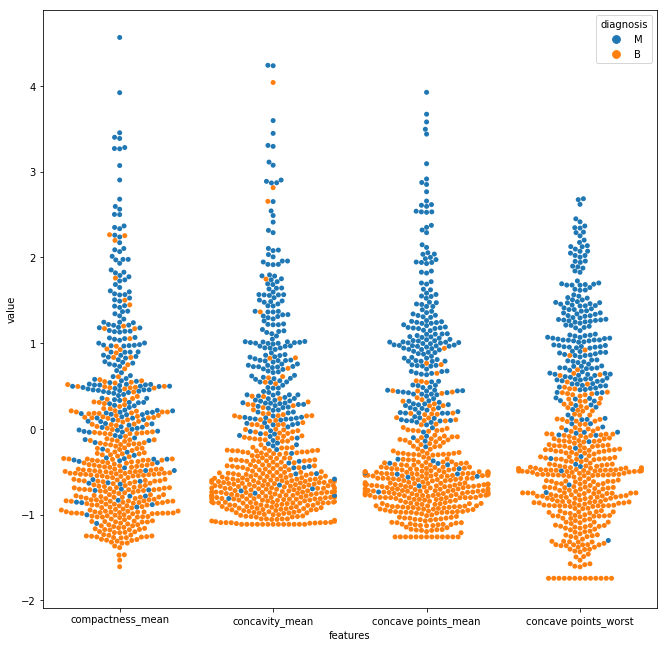

In [252]:
f,ax = plt.subplots(figsize=(11, 11))
sns.swarmplot(x='features',y='value', hue='diagnosis', data=df)

In [253]:
# concavity_mean e concave points_mean me deixaram em duvida em qual escolher. Vamos escolher a 
# concave points_mean apriori

In [255]:
df= dataBreastCancerNormalize.loc[:,['compactness_worst', 'concavity_worst','concavity_mean']]
df = pd.concat([y,df],axis=1)

In [257]:
df = pd.melt(df,id_vars='diagnosis',var_name='features', value_name='value')

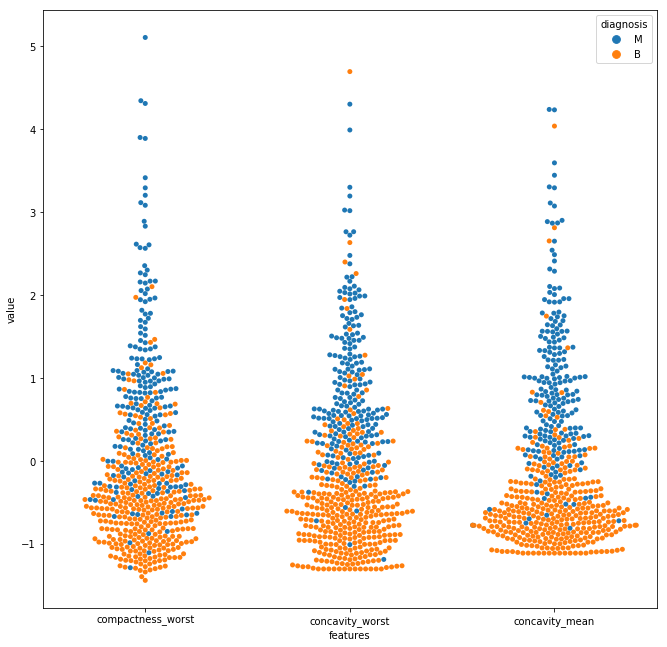

In [259]:
f,ax = plt.subplots(figsize= (11,11))
sns.swarmplot(x='features',y='value', data=df,hue='diagnosis')

In [260]:
#cancavity_worst aparentemente esta melhor definida


In [262]:
df = dataBreastCancerNormalize.loc[:,['texture_worst','texture_mean']]
df = pd.concat([y,df], axis=1)

In [264]:
df = pd.melt(df,id_vars='diagnosis',var_name='features',value_name='value')

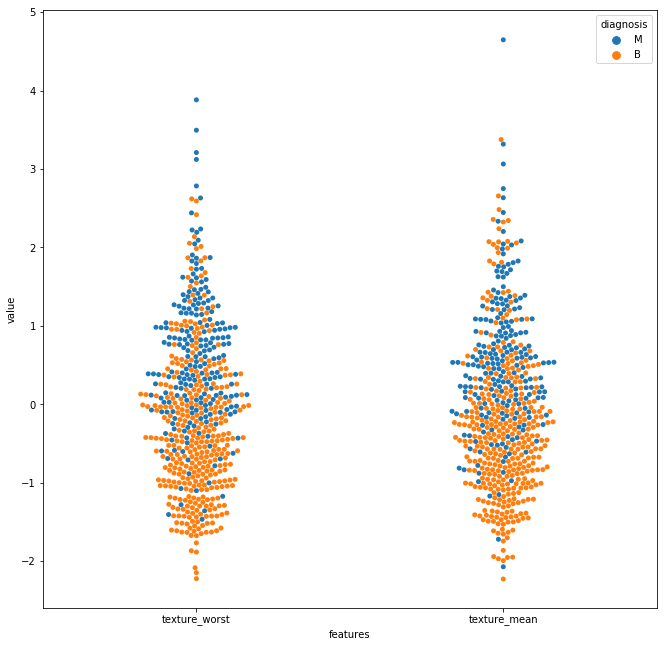

In [266]:
f,ax= plt.subplots(figsize=(11,11))
sns.swarmplot(x='features',y='value',data=df,hue='diagnosis')

In [267]:
# a variavel escolhida será a texture mean

In [268]:
lista= ['concavity_mean','compactness_mean','area_worst', 'area_se','area_mean','compactness_mean', 'concavity_mean', 'concave points_worst','compactness_worst','concavity_mean','texture_worst']

In [270]:
dataBreastCancer = dataBreastCancer.drop(lista,axis=1)


In [272]:
dataBreastCancer.head()

texture_mean  smoothness_mean  concave points_mean  symmetry_mean  \
0         10.38          0.11840              0.14710         0.2419   
1         17.77          0.08474              0.07017         0.1812   
2         21.25          0.10960              0.12790         0.2069   
3         20.38          0.14250              0.10520         0.2597   
4         14.34          0.10030              0.10430         0.1809   

   fractal_dimension_mean  texture_se  smoothness_se  compactness_se  \
0                 0.07871      0.9053       0.006399         0.04904   
1                 0.05667      0.7339       0.005225         0.01308   
2                 0.05999      0.7869       0.006150         0.04006   
3                 0.09744      1.1560       0.009110         0.07458   
4                 0.05883      0.7813       0.011490         0.02461   

   concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0       0.05373            0.01587      0.03003              0.006193   
1       0.01860            0.01340      0.01389              0.003532   
2       0.03832            0.02058      0.02250              0.004571   
3       0.05661            0.01867      0.05963              0.009208   
4       0.05688            0.01885      0.01756              0.005115   

   smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
0            0.1622           0.7119          0.4601                  0.11890  
1            0.1238           0.2416          0.2750                  0.08902  
2            0.1444           0.4504          0.3613                  0.08758  
3            0.2098           0.6869          0.6638                  0.17300  
4            0.1374           0.4000          0.2364                  0.07678

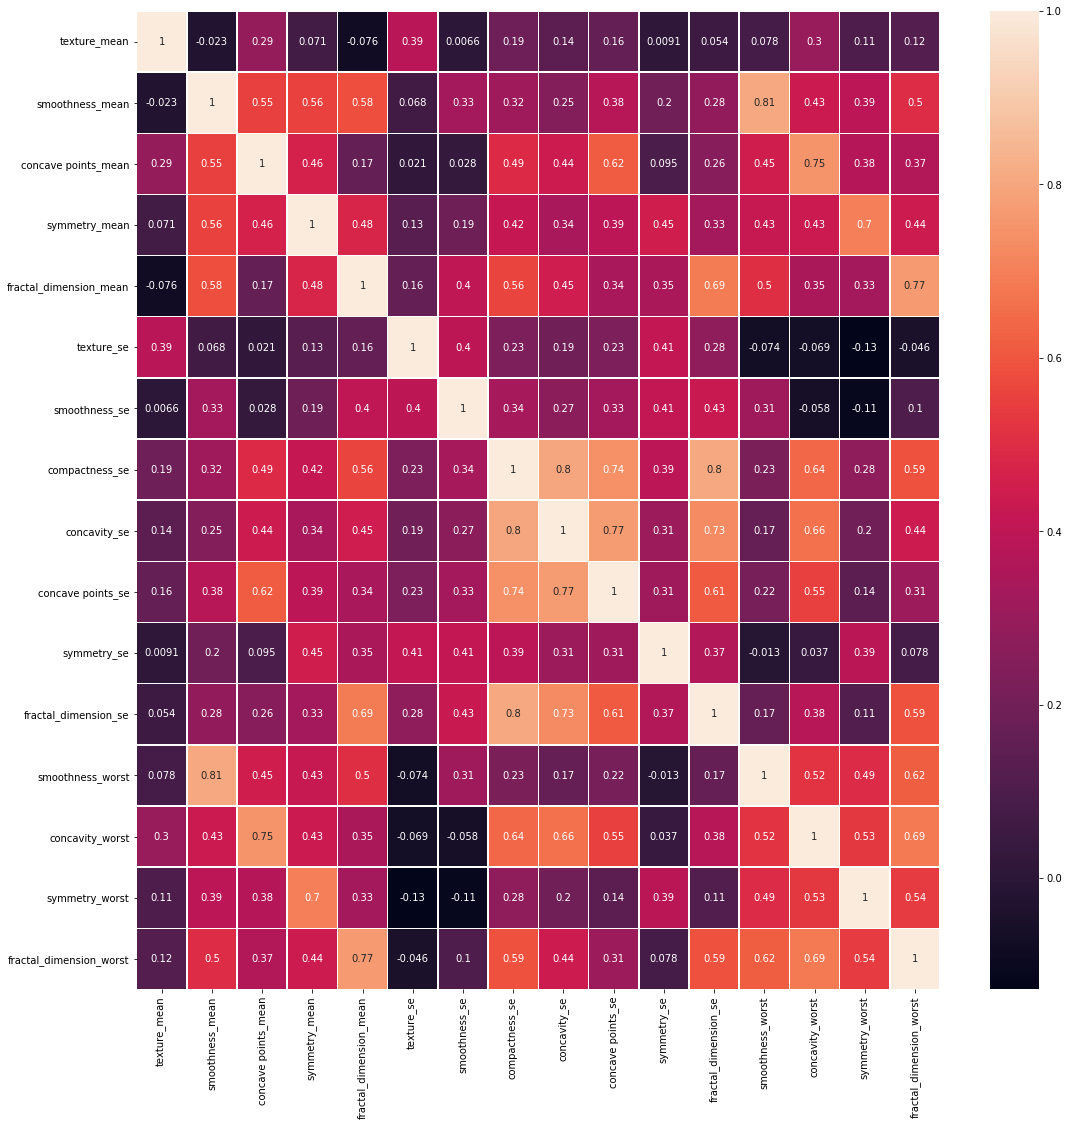

In [273]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataBreastCancer.corr(),annot=True,linewidths=.5,ax=ax)

### <p style="color:blue"> Agora vamos verificar se as features foram escolhidas corretamente</p>